In [1]:
import tensorflow as tf

In [2]:
tf.enable_eager_execution()
print(tf.executing_eagerly())

True


In [3]:
import numpy as np

In [4]:
X_data = np.random.random((10000,2))

In [5]:
X_data

array([[0.00524662, 0.11702478],
       [0.03004481, 0.83221913],
       [0.03621821, 0.39181878],
       ...,
       [0.21744713, 0.42617115],
       [0.43377152, 0.88005568],
       [0.50909975, 0.94577261]])

In [6]:
sample_weights = np.array([3, 4])

In [7]:
y_data = np.matmul(X_data, sample_weights.transpose())

In [8]:
y_data

array([0.48383899, 3.41901093, 1.67592974, ..., 2.35702597, 4.82153728,
       5.31038969])

In [9]:
y_data.shape

(10000,)

In [10]:
y_data = y_data.reshape(len(y_data),1)

In [11]:
y_data.shape

(10000, 1)

In [12]:
y_data

array([[0.48383899],
       [3.41901093],
       [1.67592974],
       ...,
       [2.35702597],
       [4.82153728],
       [5.31038969]])

In [13]:
# Add noise to data
y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))

In [14]:
y_data

array([[0.41596615],
       [3.35113809],
       [1.60805691],
       ...,
       [2.28915313],
       [4.75366444],
       [5.24251686]])

In [15]:
#  Split data to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [16]:
X_train.shape

(8000, 2)

In [17]:
X_train

array([[0.58408645, 0.17542469],
       [0.13420993, 0.01351474],
       [0.81999127, 0.22493859],
       ...,
       [0.16918431, 0.78667633],
       [0.74732915, 0.88505324],
       [0.59212997, 0.15430513]])

In [18]:
X_test.shape

(2000, 2)

In [19]:
tfe = tf.contrib.eager

In [20]:
# Khai bao bien
w = tfe.Variable([[1.0, 1.0]])
b = tfe.Variable(np.random.uniform(-0.2, 0.2))

In [21]:
# Linear Regression
def linear_regression(inputs):
    return tf.matmul(inputs,w, transpose_b=True)

In [22]:
# Loss function mean square error
def loss_function(model_fn, inputs, labels):
    return tf.reduce_mean(tf.square(model_fn(inputs) - labels))

In [23]:
# Paramaters
learning_rate = 0.002
num_steps = 10000

In [24]:
# Optimizer
optimizer  = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Caculate gradient
grad = tfe.implicit_gradients(loss_function)

In [25]:
# Training model
for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression, np.float32(X_train), np.float32(y_train)))
    if step % 100 ==0:
        train_loss = loss_function(linear_regression, np.float32(X_train), np.float32(y_train))
        test_loss = loss_function(linear_regression, np.float32(X_test), np.float32(y_test))
        print ("Step {} train loss = {} test loss = {}".format(step, train_loss, test_loss))

Step 0 train loss = 7.04918909072876 test loss = 6.976617813110352
Step 100 train loss = 4.406541347503662 test loss = 4.364357948303223
Step 200 train loss = 2.758683204650879 test loss = 2.7347662448883057
Step 300 train loss = 1.7308827638626099 test loss = 1.717836856842041
Step 400 train loss = 1.0895849466323853 test loss = 1.0829213857650757
Step 500 train loss = 0.689218282699585 test loss = 0.6862300038337708
Step 600 train loss = 0.43906036019325256 test loss = 0.43813034892082214
Step 700 train loss = 0.28255948424339294 test loss = 0.2827324867248535
Step 800 train loss = 0.18446679413318634 test loss = 0.1851881742477417
Step 900 train loss = 0.12281285226345062 test loss = 0.12376752495765686
Step 1000 train loss = 0.08390292525291443 test loss = 0.08491823077201843
Step 1100 train loss = 0.05919891223311424 test loss = 0.060185279697179794
Step 1200 train loss = 0.043377745896577835 test loss = 0.044293101876974106
Step 1300 train loss = 0.033119797706604004 test loss = 

In [26]:
w.numpy()

array([[2.9612942, 3.922976 ]], dtype=float32)

In [27]:
b.numpy()

-0.17148267

In [28]:
y_pred = linear_regression(np.float32(X_test))

In [29]:
y_pred

<tf.Tensor: id=181828, shape=(2000, 1), dtype=float32, numpy=
array([[4.502651 ],
       [3.7337623],
       [4.333744 ],
       ...,
       [3.8940823],
       [1.8579803],
       [2.586601 ]], dtype=float32)>

In [30]:
y_test

array([[4.5058752 ],
       [3.7311503 ],
       [4.33921611],
       ...,
       [3.90181952],
       [1.81709078],
       [2.56527698]])

In [31]:
import matplotlib.pyplot as plt

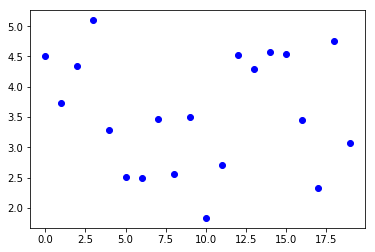

In [32]:
plt.plot(range(len(y_test[:20])), y_test[:20],'bo')

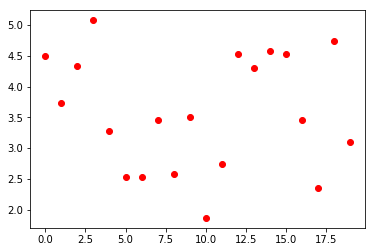

In [35]:
plt.plot(range(len(y_pred.numpy()[:20])), y_pred.numpy()[:20],'ro')